In [4]:
import pandas as pd

In [5]:
df_fake = pd.read_csv('dataset/Fake.csv')
df_true = pd.read_csv('dataset/True.csv')

In [6]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
print(df_fake.shape)
print(df_true.shape)

(23481, 4)
(21417, 4)


In [8]:
# add labels and concatinate
df_fake['label'] = 0  # fakes
df_true['label'] = 1  # real news

df = pd.concat([df_fake, df_true], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
df.head()

,title,text,subject,date,label
0,Canada’s Foreign Minister: We Must Now Fill T...,Donald Trump has done so much damage that othe...,News,"June 6, 2017",0
1,"FOX News MOCKS MSNBC’s Chris Matthews, Who Act...",MSNBC s Chris Matthews deemed the big story ...,politics,"Jul 9, 2017",0
2,Police arrest seven youths after deadly Malays...,KUALA LUMPUR (Reuters) - Police in Malaysia ha...,worldnews,"September 16, 2017",1
3,CONVENIENT? ‘Active Shooter’ Kills 5 in Fort L...,"21st Century Wire says Incredibly, on the same...",Middle-east,"January 6, 2017",0
4,How Ted Cruz win in Supreme Court hurt U.S.-Me...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"April 5, 2016",1


In [10]:
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [11]:
df.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

# Date preparation

In [12]:
len(df['date'].unique())

2397

In [13]:
df['date'] = pd.to_datetime(df['date'], format='mixed', errors='coerce') #there are a lot of inccorect values

In [14]:
df.dtypes

title              object
text               object
subject            object
date       datetime64[ns]
label               int64
dtype: object

In [15]:
len(df['date'].unique())

1011

In [16]:
df[df['date'].isna()].head(10)

,title,text,subject,date,label
2776,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,NaT,0
6514,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,0
10787,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,NaT,0
10962,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,0
11779,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,NaT,0
19759,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,0
32416,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,NaT,0
36955,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,NaT,0
38489,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,NaT,0
43769,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,NaT,0


In [17]:
df.isna().sum()

title       0
text        0
subject     0
date       10
label       0
dtype: int64

In [18]:
df = df.dropna(subset=['date'])

In [19]:
# add date features
df['year'] = df['date'].dt.year.astype('int32')
df['month'] = df['date'].dt.month.astype('int32')
df['day'] = df['date'].dt.day.astype('int32')

In [20]:
df.head()

,title,text,subject,date,label,year,month,day
0,Canada’s Foreign Minister: We Must Now Fill T...,Donald Trump has done so much damage that othe...,News,2017-06-06,0,2017,6,6
1,"FOX News MOCKS MSNBC’s Chris Matthews, Who Act...",MSNBC s Chris Matthews deemed the big story ...,politics,2017-07-09,0,2017,7,9
2,Police arrest seven youths after deadly Malays...,KUALA LUMPUR (Reuters) - Police in Malaysia ha...,worldnews,2017-09-16,1,2017,9,16
3,CONVENIENT? ‘Active Shooter’ Kills 5 in Fort L...,"21st Century Wire says Incredibly, on the same...",Middle-east,2017-01-06,0,2017,1,6
4,How Ted Cruz win in Supreme Court hurt U.S.-Me...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,2016-04-05,1,2016,4,5


In [21]:
df.drop('date', axis=1, inplace=True)

In [22]:
df.head()

,title,text,subject,label,year,month,day
0,Canada’s Foreign Minister: We Must Now Fill T...,Donald Trump has done so much damage that othe...,News,0,2017,6,6
1,"FOX News MOCKS MSNBC’s Chris Matthews, Who Act...",MSNBC s Chris Matthews deemed the big story ...,politics,0,2017,7,9
2,Police arrest seven youths after deadly Malays...,KUALA LUMPUR (Reuters) - Police in Malaysia ha...,worldnews,1,2017,9,16
3,CONVENIENT? ‘Active Shooter’ Kills 5 in Fort L...,"21st Century Wire says Incredibly, on the same...",Middle-east,0,2017,1,6
4,How Ted Cruz win in Supreme Court hurt U.S.-Me...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,1,2016,4,5


In [23]:
df.dtypes

title      object
text       object
subject    object
label       int64
year        int32
month       int32
day         int32
dtype: object

# Column prep

<Axes: xlabel='subject'>

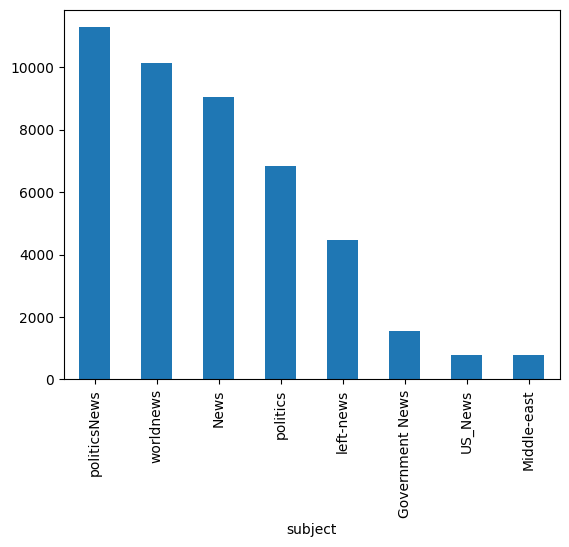

In [24]:
df['subject'].value_counts().plot(kind='bar')

In [25]:
# subject column doesn't contain valuable information
df.drop('subject', axis=1, inplace=True)

In [26]:
df.head()

,title,text,label,year,month,day
0,Canada’s Foreign Minister: We Must Now Fill T...,Donald Trump has done so much damage that othe...,0,2017,6,6
1,"FOX News MOCKS MSNBC’s Chris Matthews, Who Act...",MSNBC s Chris Matthews deemed the big story ...,0,2017,7,9
2,Police arrest seven youths after deadly Malays...,KUALA LUMPUR (Reuters) - Police in Malaysia ha...,1,2017,9,16
3,CONVENIENT? ‘Active Shooter’ Kills 5 in Fort L...,"21st Century Wire says Incredibly, on the same...",0,2017,1,6
4,How Ted Cruz win in Supreme Court hurt U.S.-Me...,WASHINGTON (Reuters) - Republican presidential...,1,2016,4,5


In [27]:
len(df.text[124])

4560

In [28]:
len(df.title[1466])

62

In [29]:
# text can be too long, takes a lot of time to process
df.drop('text', axis=1, inplace=True)

In [30]:
df.head()

,title,label,year,month,day
0,Canada’s Foreign Minister: We Must Now Fill T...,0,2017,6,6
1,"FOX News MOCKS MSNBC’s Chris Matthews, Who Act...",0,2017,7,9
2,Police arrest seven youths after deadly Malays...,1,2017,9,16
3,CONVENIENT? ‘Active Shooter’ Kills 5 in Fort L...,0,2017,1,6
4,How Ted Cruz win in Supreme Court hurt U.S.-Me...,1,2016,4,5


In [31]:
corr = df.select_dtypes('number').corr()
corr

,label,year,month,day
label,1.000000,0.407359,0.277868,0.006633
year,0.407359,1.000000,0.092239,-0.004292
month,0.277868,0.092239,1.000000,-0.031919
day,0.006633,-0.004292,-0.031919,1.000000


In [32]:
# day has almost no correlation with label
df.drop('day', axis=1, inplace=True)

# Tokenization

In [33]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\papul.DESKTOP-
[nltk_data]     U29R0P8.000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\papul.DESKTOP-
[nltk_data]     U29R0P8.000\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [34]:
def preprocess_text(text):
    # delete symbols and make lowercase 
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A).lower()

    # delete stop words
    stop_words = set(stopwords.words('english'))
    
    tokens = text.split()
    tokens = [t for t in tokens if t not in stop_words]
    
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    return ' '.join(tokens)

In [35]:
# Применение к тексту
df['processed_title'] = df['title'].apply(preprocess_text)

In [36]:
df.head()

,title,label,year,month,processed_title
0,Canada’s Foreign Minister: We Must Now Fill T...,0,2017,6,canada foreign minister must fill global leade...
1,"FOX News MOCKS MSNBC’s Chris Matthews, Who Act...",0,2017,7,fox news mock msnbcs chris matthew actually sa...
2,Police arrest seven youths after deadly Malays...,1,2017,9,police arrest seven youth deadly malaysia scho...
3,CONVENIENT? ‘Active Shooter’ Kills 5 in Fort L...,0,2017,1,convenient active shooter kill fort lauderdale...
4,How Ted Cruz win in Supreme Court hurt U.S.-Me...,1,2016,4,ted cruz win supreme court hurt usmexico relation


In [37]:
df.drop('title', axis=1, inplace=True)

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [39]:
df.dtypes

label               int64
year                int32
month               int32
processed_title    object
dtype: object

In [40]:
type(df['processed_title'][0])

str

In [41]:
df['processed_title'].str.len().max()

237

In [42]:
from matplotlib import pyplot as plt
%matplotlib inline

(array([4.000e+00, 2.100e+01, 2.500e+01, 1.090e+02, 1.770e+02, 5.300e+02,
        1.291e+03, 2.055e+03, 4.651e+03, 5.139e+03, 7.238e+03, 4.774e+03,
        4.783e+03, 3.601e+03, 2.172e+03, 1.978e+03, 1.135e+03, 1.050e+03,
        8.380e+02, 5.060e+02, 6.590e+02, 3.750e+02, 4.270e+02, 2.690e+02,
        2.750e+02, 2.270e+02, 1.520e+02, 1.450e+02, 6.300e+01, 7.200e+01,
        4.500e+01, 2.800e+01, 1.600e+01, 7.000e+00, 1.500e+01, 7.000e+00,
        9.000e+00, 3.000e+00, 8.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  8.  ,  12.58,  17.16,  21.74,  26.32,  30.9 ,  35.48,  40.06,
         44.64,  49.22,  53.8 ,  58.38,  62.96,  67.54,  72.12,  76.7 ,
         81.28,  85.86,  90.44,  95.02,  99.6 , 104.18, 108.76, 113.34,
        117.92, 122.5 , 127.08, 131.66, 136.24, 140.82, 145.4 , 149.98,
        154.56, 159.14, 163.72, 168.3 , 172.88, 177.46, 182.04, 186.62,
        191.2 , 

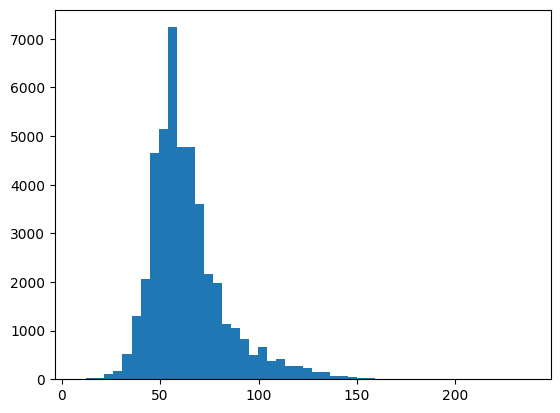

In [43]:
lengths = df['processed_title'].str.len()
plt.hist(lengths, bins=50)

{'whiskers': [<matplotlib.lines.Line2D at 0x19547673c50>,
 'caps': [<matplotlib.lines.Line2D at 0x1954e008150>,
 'boxes': [<matplotlib.lines.Line2D at 0x1954dff2110>],
 'medians': [<matplotlib.lines.Line2D at 0x1954e009610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1954e00a110>],
 'means': []}

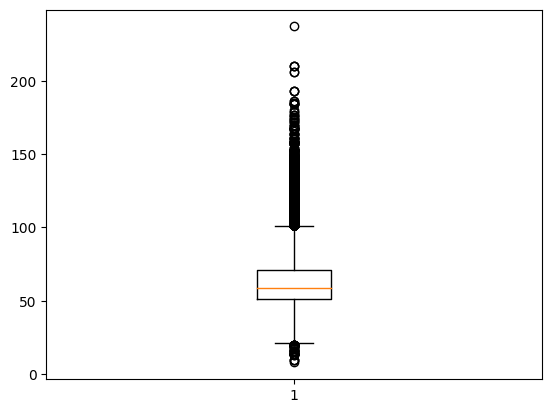

In [44]:
plt.boxplot(lengths)

In [45]:
# set params
MAX_WORDS = 10000  
MAX_SEQ_LEN = 100

In [46]:
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df['processed_title'])


In [47]:
sequences = tokenizer.texts_to_sequences(df['processed_title'])
X = pad_sequences(sequences, maxlen=MAX_SEQ_LEN)

In [48]:
X.shape

(44888, 100)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'].values, test_size=0.2)

In [51]:
X_train.shape

(35910, 100)

I've end up not using data column. Despite the moderate correlation with the target variable, they can make artificial dependencies, associated with temporary trends, and not with the content of the text Also their usage requires more complex architecture of the model (multiple inputs).

# Models

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, Dropout, Bidirectional, GRU

In [53]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [69]:
# Stacked simple RNN + dropout
model1 = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_SEQ_LEN),
    SimpleRNN(64, activation='tanh', return_sequences=True),
    Dropout(0.3),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])


model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history1 = model1.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 43s 89ms/step - loss: 0.1928 - accuracy: 0.9173 - val_loss: 0.1243 - val_accuracy: 0.9525
Epoch 2/10
449/449 [==============================] - 39s 87ms/step - loss: 0.0510 - accuracy: 0.9824 - val_loss: 0.1496 - val_accuracy: 0.9483
Epoch 3/10
449/449 [==============================] - 40s 90ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.2122 - val_accuracy: 0.9447


In [56]:
# Stacked LSTM + dropout
model2 = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 151s 326ms/step - loss: 0.1963 - accuracy: 0.9162 - val_loss: 0.1425 - val_accuracy: 0.9432
Epoch 2/10
449/449 [==============================] - 148s 329ms/step - loss: 0.0729 - accuracy: 0.9740 - val_loss: 0.1363 - val_accuracy: 0.9527
Epoch 3/10
449/449 [==============================] - 137s 306ms/step - loss: 0.0408 - accuracy: 0.9867 - val_loss: 0.1604 - val_accuracy: 0.9499
Epoch 4/10
449/449 [==============================] - 136s 304ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.1923 - val_accuracy: 0.9488


In [57]:
# Bidirectional GRU
model3 = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN),
    Bidirectional(GRU(64)),
    Dense(1, activation='sigmoid')
])

model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history3 = model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 65s 134ms/step - loss: 0.1964 - accuracy: 0.9151 - val_loss: 0.1343 - val_accuracy: 0.9488
Epoch 2/10
449/449 [==============================] - 60s 133ms/step - loss: 0.0697 - accuracy: 0.9759 - val_loss: 0.1275 - val_accuracy: 0.9518
Epoch 3/10
449/449 [==============================] - 60s 134ms/step - loss: 0.0363 - accuracy: 0.9880 - val_loss: 0.1569 - val_accuracy: 0.9504
Epoch 4/10
449/449 [==============================] - 60s 134ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.2077 - val_accuracy: 0.9483


# Tuning hyperparameters 

In [59]:
# with RMSprop optimizer instead of Adam
model3.compile(
    optimizer='RMSprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history4 = model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 62s 128ms/step - loss: 0.0359 - accuracy: 0.9946 - val_loss: 0.2389 - val_accuracy: 0.9492
Epoch 2/10
449/449 [==============================] - 58s 129ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.2672 - val_accuracy: 0.9507
Epoch 3/10
449/449 [==============================] - 58s 129ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.3015 - val_accuracy: 0.9461


In [60]:
# with batch_size=128 instead of 64
model3.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history5 = model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
225/225 [==============================] - 80s 316ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.2888 - val_accuracy: 0.9433
Epoch 2/10
225/225 [==============================] - 64s 284ms/step - loss: 0.0062 - accuracy: 0.9976 - val_loss: 0.3040 - val_accuracy: 0.9443
Epoch 3/10
225/225 [==============================] - 63s 278ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.3386 - val_accuracy: 0.9443


In [62]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [63]:
# with reducing LR on plateau
callbacks = [
    EarlyStopping(patience=2),  
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)  
]

model3.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history6 = model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 67s 138ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.3043 - val_accuracy: 0.9424
Epoch 2/10
449/449 [==============================] - 80s 179ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.3344 - val_accuracy: 0.9446
Epoch 3/10
449/449 [==============================] - 72s 160ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.3625 - val_accuracy: 0.9457


# Simple models

In [74]:
# Simple RNN
simple_model1 = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_SEQ_LEN),
    SimpleRNN(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

simple_model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history7 = simple_model1.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 26s 54ms/step - loss: 0.1911 - accuracy: 0.9217 - val_loss: 0.1239 - val_accuracy: 0.9504
Epoch 2/10
449/449 [==============================] - 24s 54ms/step - loss: 0.0555 - accuracy: 0.9822 - val_loss: 0.1374 - val_accuracy: 0.9495
Epoch 3/10
449/449 [==============================] - 25s 55ms/step - loss: 0.0191 - accuracy: 0.9943 - val_loss: 0.1725 - val_accuracy: 0.9499


In [76]:
# Simple LSTM
simple_model2 = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

simple_model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history8 = simple_model2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 94s 203ms/step - loss: 0.1926 - accuracy: 0.9213 - val_loss: 0.1313 - val_accuracy: 0.9499
Epoch 2/10
449/449 [==============================] - 88s 196ms/step - loss: 0.0773 - accuracy: 0.9714 - val_loss: 0.1304 - val_accuracy: 0.9502
Epoch 3/10
449/449 [==============================] - 88s 197ms/step - loss: 0.0424 - accuracy: 0.9855 - val_loss: 0.1569 - val_accuracy: 0.9486
Epoch 4/10
449/449 [==============================] - 88s 195ms/step - loss: 0.0238 - accuracy: 0.9917 - val_loss: 0.1805 - val_accuracy: 0.9485


In [77]:
# Simple GRU
simple_model3 = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_SEQ_LEN),
    GRU(64),
    Dense(1, activation='sigmoid')
])

simple_model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history9 = simple_model3.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=callback
)

Epoch 1/10
449/449 [==============================] - 46s 97ms/step - loss: 0.1926 - accuracy: 0.9176 - val_loss: 0.1279 - val_accuracy: 0.9520
Epoch 2/10
449/449 [==============================] - 44s 98ms/step - loss: 0.0679 - accuracy: 0.9761 - val_loss: 0.1338 - val_accuracy: 0.9502
Epoch 3/10
449/449 [==============================] - 44s 98ms/step - loss: 0.0361 - accuracy: 0.9879 - val_loss: 0.1565 - val_accuracy: 0.9458
